# Q3 - Rejection Sampling

_Arman Rezaei - 9723034_

**Important Notes**

- The _target_ distribution's density function will be denoted with $f(x)$
- The _trial_ distribution's density function will be denoted with $g(x)$

**Basic Algorithm**

1. Generate $U \sim \text{Uniform(0, 1)}$
2. Generate $X \sim g(x)$
3. If $U \le \frac{f(X)}{M \cdot g(X)}$ then accept $X$ as a realization from
$f(x)$, otherwise reject $X$ and try again

**Goals**

Our goal in this notebook is to generate random samples for the Normal distribution using the Cauchy distribution as our trial.

## Step 1: Visualizing Our Distributions

Here is a quick visualization so things can stand in prespective.

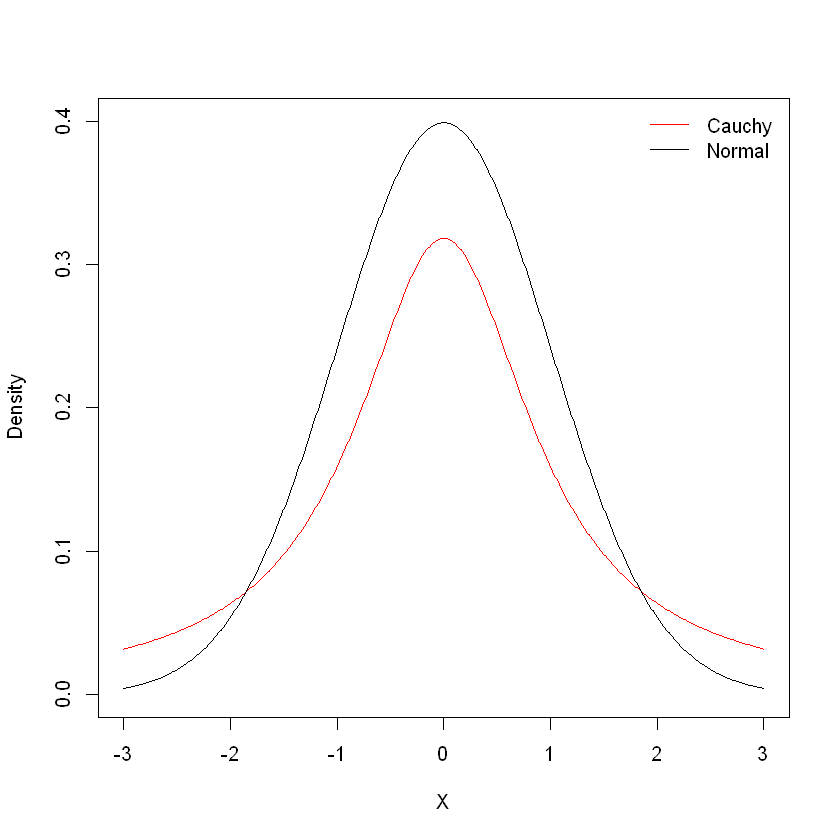

In [1]:
x <- seq(-3, 3, .01)

plot(x, dcauchy(x), type="l", col="red", ylim=c(0, .4), xlab="X", ylab="Density")
lines(x, dnorm(x))

legend("topright", legend=c("Cauchy", "Normal"), lty=1, col=c("red", "black"), bty="n")

## Step 2: Calculating $M$

$$
f(x) = \frac{1}{\sqrt{2 \pi}} e^{\tfrac{-x^2}{2}}
$$

$$
g(x) = \frac{1}{\pi} \frac{1}{1 + x^2}
$$

$$
\frac{f(x)}{g(x)} = \sqrt{\frac{\pi}{2}} (1 + x^2) e^{\tfrac{-x^2}{2}} \le
\sqrt{\frac{2 \pi}{e}} \simeq 1.52
$$

Please take note that we used the following piece of code from Python's **SymPy** to calculate the limits of $\frac{f(x)}{g(x)}$:

```python
from sympy import *
init_session()

# define functions
f = 1/sqrt(2*pi) * exp(-x**2 / 2)
g = 1/pi * 1/(1 + x**2)

expr = f/g

# calculate derivative
diff_expr = diff(expr, x)

# solve for "diff_expr = 0"
answers = solveset(diff_expr)
print(answers)  # {-1, 0, 1}

# plot function so we can determine minima and maxima
plot(expr)  # 0 returns a minima and -1, 1 are global maximas

# the limit of "expr"
answer = expr.subs(x, -1).evalf()
print(f"The limit is {answer:.2f}")
```

## Step 3: Coding it All

In [2]:
# sample size
n <- 10000
M <- 1.52

# function to determine acception/rejection
accept <- function(x) {
  u <- runif(1)
  if ( (1/M * (pi / 2)^.5 * (1 + x^2) * exp(-x^2 / 2)) > u) {
    return(TRUE)
  }
  return(FALSE)
}


# trials
X <- rep(0, n)
niter <- 0
sample <- NULL

for (i in 1:n) {
  # keep trying until acception
  flag <- FALSE
  while (flag == FALSE) {
    # increment counter
    niter <- niter + 1

    # generate candidate
    sample <- rcauchy(1)
    flag <- accept(sample)
  }

  X[i] <- sample
}

In [3]:
mean(X)

[1] 0.001082255

In [4]:
var(X)

[1] 0.9804528

In [5]:
niter

[1] 15280

We can see that the mean and variance are very close to the theoretical mean and variance of the Normal distribution. Also note that the number of iterations required is 

$$
M \cdot n = 1.52 \times 10000 \simeq 15200
$$

Also, keep in mind that

$$
P(\text{accept}) = \dfrac{1}{M} = \dfrac{1}{52} = .66
$$

## Step 4: Generating 5 Random Variates

In [6]:
n <- 5

X <- rep(0, n)
sample <- NULL

for (i in 1:n) {
  # keep trying until acception
  flag <- FALSE
  while (flag == FALSE) {
    # generate candidate
    sample <- rcauchy(1)
    flag <- accept(sample)
  }

  X[i] <- sample
}

print(X)

[1]  0.05767254  0.03340663  0.03644511  1.49799635 -1.25518305
